In [1]:
from __future__ import print_function

import os
import zipfile as zf #learned from StackOverflow
import pandas as pd
#import numpy as np
import pylab as pl

%pylab inline
import seaborn

from pandas import Series #???....

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
os.getenv("PUIDATA")

'/home/cusp/xz694/PUIdata'

In [3]:
zippedData = zf.ZipFile(os.getenv("PUIDATA") + "/201506-citibike-tripdata.zip")

In [4]:
zippedData.extractall() #learned from StackOverflow

In [5]:
!mv "201506-citibike-tripdata.csv" "$PUIDATA" #says "permission denied" but still moved the file.

mv: setting attribute `security.selinux' for `security.selinux': Permission denied


In [6]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/201506-citibike-tripdata.csv")

In [7]:
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


## IDEA: Subcriber riders make longer bike trips.
### Null Hypothesis H<sub>0</sub> and Alternative Hypothesis H<sub>a</sub>--
#### H<sub>0</sub>: The average trip duration of a subscriber is the same as or shorter than that of a regular customer. i.e., Tavg_sub <= Tavg_cust
#### H<sub>a</sub>: The average trip duration of a subscriber is longer than that of a regular customer. i.e., Tavg_sub > Tavg_cust
### Significance level: $\alpha$ = 0.05

In [8]:
df1.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [9]:
dfUserTrip = df1.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid', 
       u'birth year', u'gender'], axis = 1)

In [10]:
dfUserTrip

,tripduration,usertype
0,1338,Subscriber
1,290,Subscriber
2,634,Subscriber
3,159,Subscriber
4,1233,Customer
5,690,Subscriber
6,766,Subscriber
7,1160,Subscriber
8,550,Subscriber
9,545,Subscriber


In [11]:
dfSubTrip = dfUserTrip[dfUserTrip['usertype'].str.contains("Subscriber")]
dfCustTrip = dfUserTrip[dfUserTrip['usertype'].str.contains("Customer")]

#or remain all in one? Can plot from there?

In [12]:
#arraySubTrip = dfSubTrip.as_matrix(columns = dfSubTrip.columns[0:1]) #learned from StackOverflow
#arraySubTrip

#arrayCustTrip = dfCustTrip.as_matrix(columns = dfCustTrip.columns[0:1])
#arrayCustTrip

In [14]:
#Tavg_sub = arraySubTrip.mean()
#Tavg_sub

#Tavg_cust = arrayCustTrip.mean()
#Tavg_cust

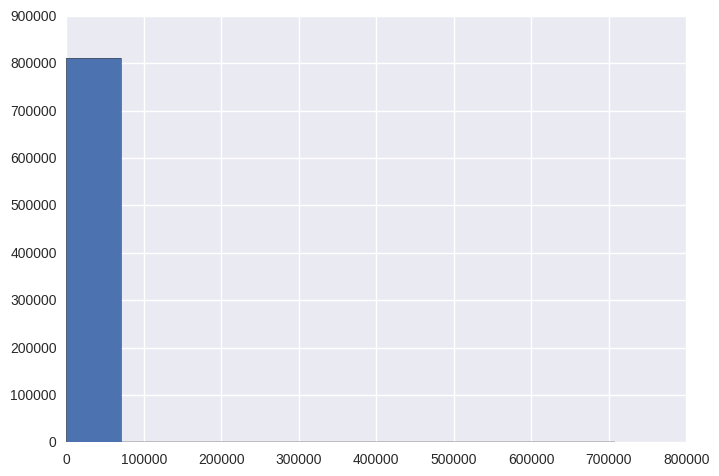

In [37]:
#???
dfSubTrip['tripduration'].hist()